In [1]:
from google.colab import files
uploaded = files.upload()

Saving stroke.csv to stroke.csv


In [2]:
import pandas as pd
df=pd.read_csv("stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
x=df.iloc[:,6].values
y=df.iloc[:,11].values

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
x=labelencoder_x.fit_transform(x)
x

array([2, 3, 2, ..., 3, 2, 0])

In [5]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x.reshape(-1,1),y)

In [6]:
x.shape

(9722, 1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
#Decision tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
pred=classifier.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[156, 817],
       [  4, 968]])

In [12]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.97      0.16      0.28       973
           1       0.54      1.00      0.70       972

    accuracy                           0.58      1945
   macro avg       0.76      0.58      0.49      1945
weighted avg       0.76      0.58      0.49      1945



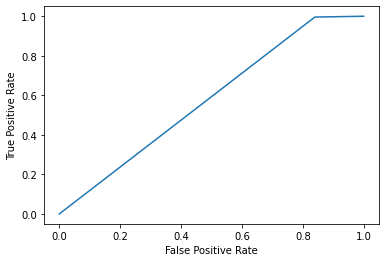

In [13]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

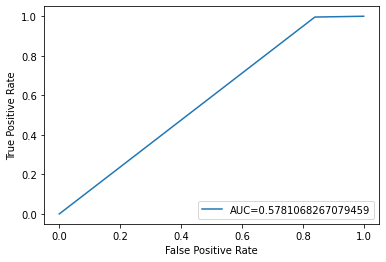

In [14]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

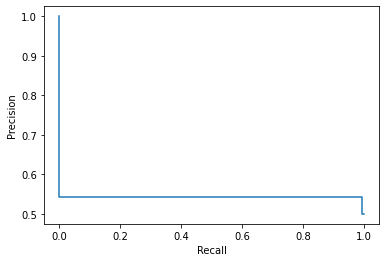

In [15]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [16]:
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
pred=classifier.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5830334190231362

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[286, 687],
       [124, 848]])

In [20]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.70      0.29      0.41       973
           1       0.55      0.87      0.68       972

    accuracy                           0.58      1945
   macro avg       0.63      0.58      0.55      1945
weighted avg       0.63      0.58      0.54      1945



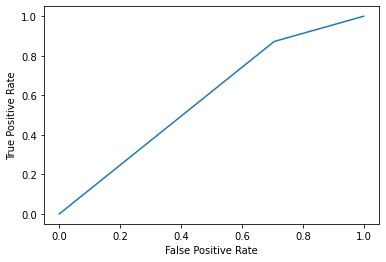

In [21]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

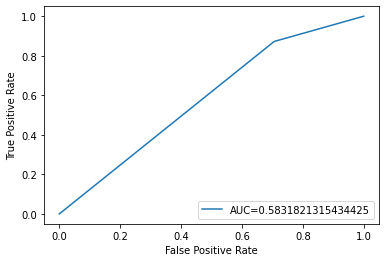

In [22]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

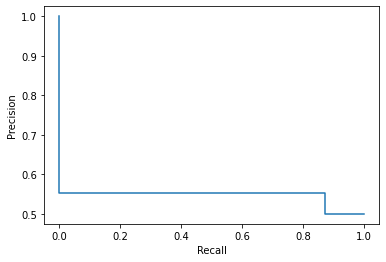

In [23]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [24]:
#svm
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [25]:
pred=classifier.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[156, 817],
       [  4, 968]])

In [28]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.97      0.16      0.28       973
           1       0.54      1.00      0.70       972

    accuracy                           0.58      1945
   macro avg       0.76      0.58      0.49      1945
weighted avg       0.76      0.58      0.49      1945



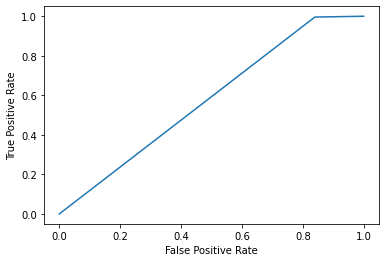

In [29]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

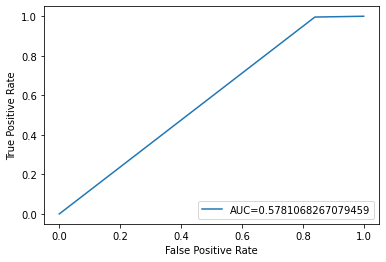

In [30]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

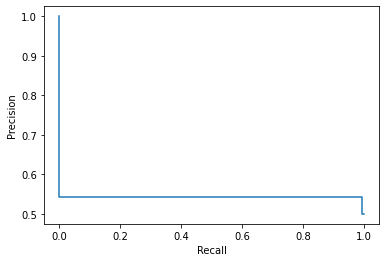

In [31]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [32]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [33]:
pred=classifier.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[156, 817],
       [  4, 968]])

In [36]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.97      0.16      0.28       973
           1       0.54      1.00      0.70       972

    accuracy                           0.58      1945
   macro avg       0.76      0.58      0.49      1945
weighted avg       0.76      0.58      0.49      1945



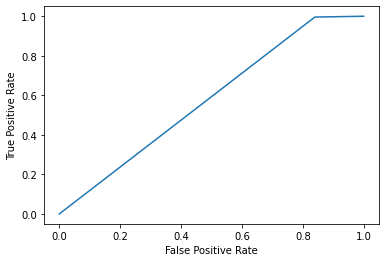

In [37]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

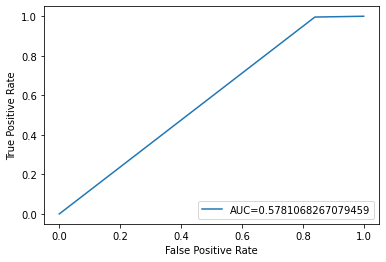

In [38]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

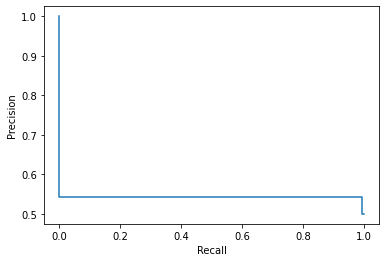

In [39]:

precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [40]:
#logistic regression
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(x_train, y_train)  

LogisticRegression()

In [41]:
pred=classifier.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5275064267352185

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[310, 663],
       [256, 716]])

In [44]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.55      0.32      0.40       973
           1       0.52      0.74      0.61       972

    accuracy                           0.53      1945
   macro avg       0.53      0.53      0.51      1945
weighted avg       0.53      0.53      0.51      1945



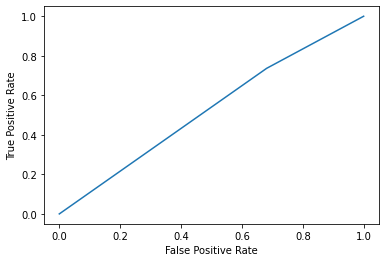

In [45]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

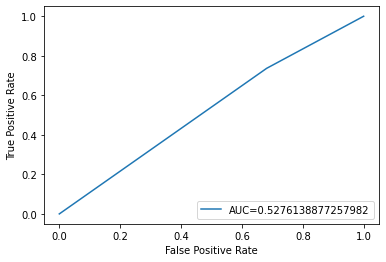

In [46]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

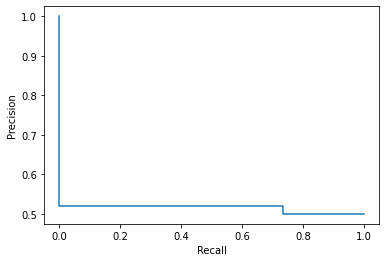

In [47]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [48]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [49]:
pred=classifier.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5326478149100257

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[440, 533],
       [376, 596]])

In [52]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.54      0.45      0.49       973
           1       0.53      0.61      0.57       972

    accuracy                           0.53      1945
   macro avg       0.53      0.53      0.53      1945
weighted avg       0.53      0.53      0.53      1945



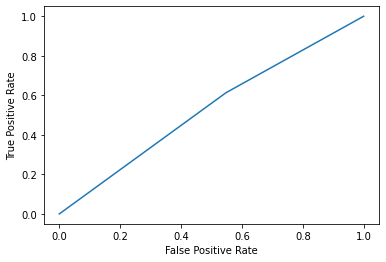

In [53]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

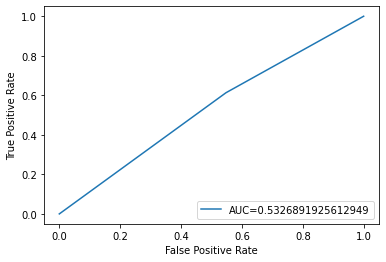

In [54]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

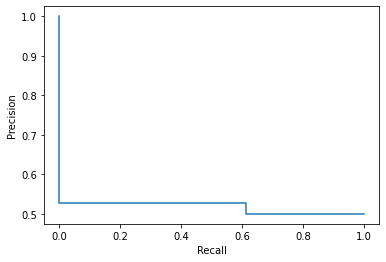

In [55]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [56]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [57]:
#fuzzy
from fcmeans import FCM
classifier = FCM(n_clusters=2)
classifier.fit(x)

In [58]:
pred=classifier.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5275064267352185

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[310, 663],
       [256, 716]])

In [61]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.55      0.32      0.40       973
           1       0.52      0.74      0.61       972

    accuracy                           0.53      1945
   macro avg       0.53      0.53      0.51      1945
weighted avg       0.53      0.53      0.51      1945



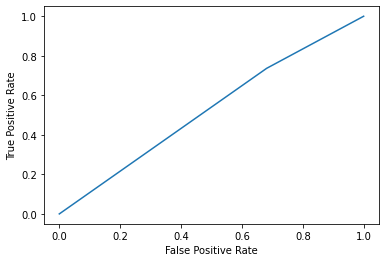

In [62]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

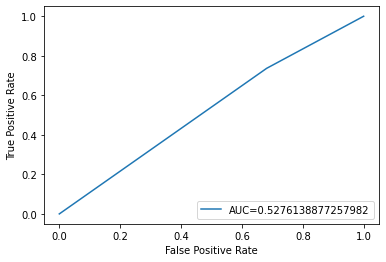

In [63]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

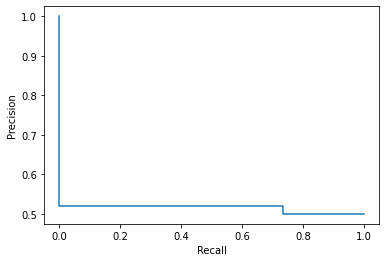

In [64]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [65]:
def new_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['dt'] = tree.DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['rf']=RandomForestClassifier()
  models['stacking'] = new_stacking()
  return models

In [66]:
from sklearn.ensemble import StackingClassifier
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('dt', tree.DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level0.append(('rf',RandomForestClassifier() ))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
  return model

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def eval_model(model):
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')
  return scr

>lr 0.5136 (0.0225)
>knn 0.5717 (0.0113)
>dt 0.5697 (0.0132)
>svm 0.5697 (0.0132)
>bayes 0.5128 (0.0247)
>rf 0.5698 (0.0126)
>stacking 0.5715 (0.0143)


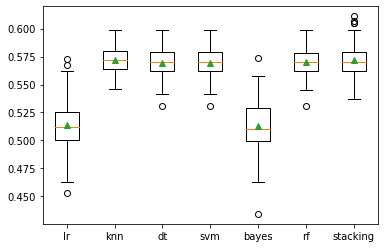

In [68]:
from numpy import mean
from numpy import std
X=x
Y=y
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = eval_model(model)
  results.append(scr)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [69]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [70]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [71]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [72]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [73]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [74]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
244/244 [==============================] - 2s 2ms/step - loss: 0.6937 - accuracy: 0.4884
Epoch 2/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5021
Epoch 3/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5010
Epoch 4/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4995
Epoch 5/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4980
Epoch 6/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5019
Epoch 7/50
244/244 [==============================] - 1s 4ms/step - loss: 0.6897 - accuracy: 0.4967
Epoch 8/50
244/244 [==============================] - 1s 4ms/step - loss: 0.6888 - accuracy: 0.5097
Epoch 9/50
244/244 [==============================] - 1s 4ms/step - loss: 0.6877 - accuracy: 0.5101
Epoch 10/50
244/244 [==============================] - 1s 3ms/step - loss: 0.6864 - accuracy: 0.5101

In [75]:
y_pred = ann.predict(x_test)

61/61 [==============================] - 0s 1ms/step


In [76]:
y_pred = (y_pred > 0.5)

In [77]:
import numpy as np
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 0]
 [1 0]]


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)


array([[151, 822],
       [  4, 968]])

In [79]:
accuracy_score(y_test, y_pred)

0.5753213367609255

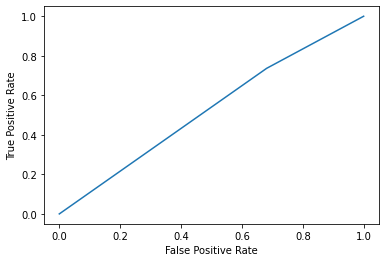

In [80]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

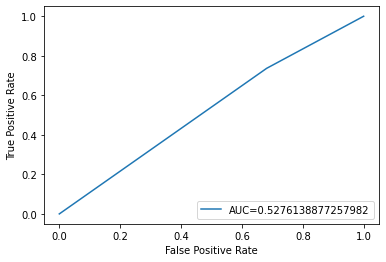

In [81]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

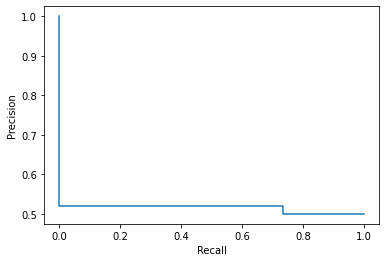

In [82]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()